In [260]:
import numpy as np 
from matplotlib import pyplot as plt

In [261]:
!pip install srd

In [262]:
import srd

# Contrainte budgétaire

In [263]:
jean = srd.Person(earn=10e3)
case = srd.Hhold(jean)
tax = srd.tax(2019)

In [264]:
case = tax.compute(case)

In [265]:
case.fam_disp_inc

14608.16

In [266]:
wage = 35.0
hours = np.linspace(0,60,100)

In [267]:
netinc = []
for h in hours: 
  jean = srd.Person(earn=wage*h*52)
  case = srd.Hhold(jean)
  case = tax.compute(case)
  netinc.append(case.fam_disp_inc)


In [268]:
leisure = 5*16 - hours

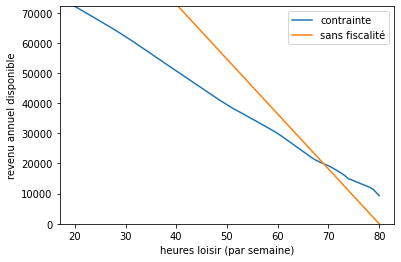

In [269]:
plt.figure()
plt.plot(leisure,netinc,label='contrainte')
plt.plot(leisure,hours*wage*52,label='sans fiscalité')
plt.xlabel('heures loisir (par semaine)')
plt.ylabel('revenu annuel disponible')
plt.ylim([0,max(netinc)])
plt.legend()
plt.show()

# TEMI

In [270]:
temis = []
for i,h in enumerate(hours[:-1]): 
   x = 1.0 - (netinc[i+1] - netinc[i])/(wage*(hours[i+1]-hours[i])*52) 
   temis.append(x)

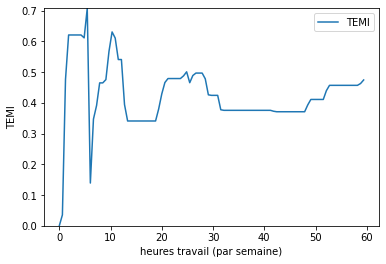

In [271]:
plt.figure()
plt.plot(hours[:-1],temis,label='TEMI')
plt.xlabel('heures travail (par semaine)')
plt.ylabel('TEMI')
plt.ylim([0,max(temis)])
plt.legend()
plt.show()

# Utilité et choix optimal

In [272]:
def u(c,h,phi,eps):
  g = 1 + + 1/eps
  return c - phi*(h**g) / g

In [273]:
eps = 1
phi = 1e-2

In [274]:
us = [u(c,h,phi,eps) for c,h in zip(netinc,hours*52)]

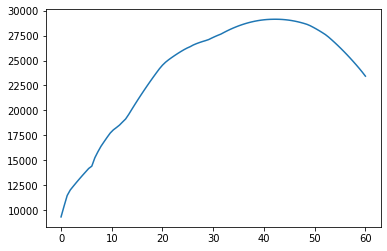

In [275]:
plt.figure()
plt.plot(hours,us)
plt.show()

In [276]:
hopt = hours[np.argmax(us)]

In [277]:
hopt

42.42424242424242

# Offre de travail

In [278]:
def supply(phi,eps,wage,tax):
  hours = np.linspace(0.0,80.0)
  netinc = []
  for h in hours: 
    p = srd.Person(earn=wage*h*52)
    case = srd.Hhold(p)
    case = tax.compute(case)
    netinc.append(case.fam_disp_inc)  
  us = [u(c,h,phi,eps) for c,h in zip(netinc,hours*52)]
  hopt = hours[np.argmax(us)]
  return hopt

In [279]:
wages = np.linspace(13.1,50.0,100)
sc = [supply(1e-2,1.0,w,tax) for w in wages]

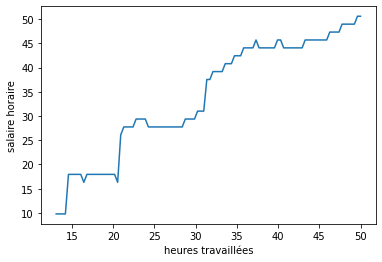

In [280]:
plt.figure()
plt.plot(wages,sc)
plt.xlabel('heures travaillées')
plt.ylabel('salaire horaire')
plt.show()

# Changer de taux d'imposition

In [281]:
tax2 = srd.tax(year=2019)

In [282]:
tax2.federal.l_rates = [t*1.25 for t in tax2.federal.l_rates]

In [283]:
tax2.federal.l_rates

[0.1875, 0.25625, 0.325, 0.3625, 0.41250000000000003]

In [284]:
href = supply(1e-2,1.0,wage,tax)
htax = supply(1e-2,1.0,wage,tax2)

In [285]:
href,htax

(42.44897959183673, 39.183673469387756)

In [286]:
eta = (htax/href-1)/0.25

In [287]:
eta

-0.3076923076923075